# The Classic Titanic Dataset! 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('Datasets/Titanic/train.csv')
test = pd.read_csv('Datasets/Titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


After taking a closer look, we can see that **Age** has some missing values in our training set as well as our testing set. Additionally **Fare** has one missing value in the testing set. Which we can take care of later.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA

Univariate Analysis

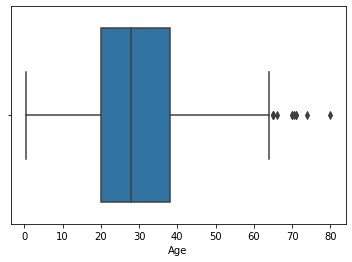

In [7]:
sns.boxplot(train.Age)

Bivariate Analysis

In [8]:
pd.crosstab(train.Sex,train.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [9]:
pd.crosstab(train.Pclass,train.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


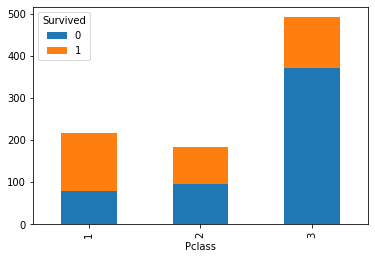

In [11]:
train.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

In [12]:
pd.crosstab(train.Pclass,train.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


We can see that Pclass can be useful for the prediction

In [13]:
import re

In [14]:
train['title'] = train['Name'].apply(lambda x : (re.search(' ([a-zA-Z]+)\.', x)).group(1))
test['title'] = test['Name'].apply(lambda x : (re.search(' ([a-zA-Z]+)\.', x)).group(1))

In [15]:
train['title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: title, Length: 891, dtype: object

In [16]:
train.title.unique()

test.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

Here we only took a part of the names of the each person. Now we can group these different names into titles.

In [17]:
titles = {'Capt':       'Officer',
          'Col':        'Officer',
          'Major':      'Officer',
          'Jonkheer':   'Royalty',
          'Don':        'Royalty',
          'Sir' :       'Royalty',
          'Dr':         'Officer',
          'Rev':        'Officer',
          'Countess':   'Royalty',
          'Dona':       'Royalty',
          'Mme':        'Mrs',
          'Mlle':       'Miss',
          'Ms':         'Mrs',
          'Mr' :        'Mr',
          'Mrs' :       'Mrs',
          'Miss' :      'Miss',
          'Master' :    'Master',
          'Lady' :      'Royalty'
                    } 

I thought of merging master to mister but it probably addresses childen, so that extra info might be useful

In [18]:
for x,y in titles.items():
    train.loc[train['title']==x,'title'] = y
    test.loc[test['title']==x,'title'] = y

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [20]:
train.title.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: title, dtype: int64

In [21]:
pd.crosstab(train.title,train.Survived)

Survived,0,1
title,,
Master,17,23
Miss,55,129
Mr,436,81
Mrs,26,101
Officer,13,5
Royalty,2,3


In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


SibSp(Sibling or Spouse) and Parch(Parents or children)

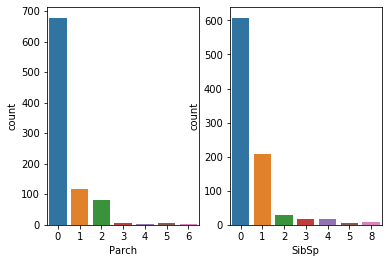

In [23]:
fig,(ax1,ax2) = plt.subplots(1,2)
sns.countplot(train.Parch,ax = ax1)
sns.countplot(train.SibSp,ax = ax2)

In [24]:
train['family'] = train['SibSp']+train['Parch']
test['family'] = test['SibSp']+test['Parch']

In [25]:
def family(x):
    if x == 0:
        return 'alone'
    elif x >=1 and x<3:
        return 'some'
    elif x >=3 and x<5:
        return 'medium'
    else:
        return 'alot'

In [26]:
train['family'] = train['family'].apply(lambda x : family(x))
test['family'] = test['family'].apply(lambda x : family(x))

In [27]:
train.family.value_counts()

alone     537
some      263
alot       47
medium     44
Name: family, dtype: int64

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,some
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,some
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,some
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,alone


In [29]:
pd.crosstab(train.Embarked,train.Survived)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [30]:
test.loc[test.Fare.isna(),'Fare'] = test.Fare.median()

In [31]:
train['Age'] = train.groupby(['Sex','Pclass','title'])['Age'].apply(lambda x: x.fillna(x.median()))

In [32]:
test['Age'] = test.groupby(['Sex','Pclass','title'])['Age'].apply(lambda x: x.fillna(x.median()))

In [33]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
title            0
family           0
dtype: int64

In [34]:
train.Embarked.fillna(train.groupby('Embarked').count()['PassengerId'],inplace = True)

In [35]:
MedEmbarked = train.groupby('Embarked').count()['PassengerId']
train.Embarked.fillna(MedEmbarked, inplace=True)

CABIN

In [36]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

The unique values seem like they can be simplified. But first we need to change the nan values to a specific value and then we will merge these classes into fewer classes.

In [37]:
train.Cabin.fillna('U',inplace = True)
test.Cabin.fillna('U',inplace = True)
train.Cabin

0         U
1       C85
2         U
3      C123
4         U
       ... 
886       U
887     B42
888       U
889    C148
890       U
Name: Cabin, Length: 891, dtype: object

In [38]:
train.Cabin = train.Cabin.apply(lambda x : x[0])
test.Cabin = test.Cabin.apply(lambda x : x[0])

In [39]:
train.Cabin.value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [40]:
pd.crosstab(train.Cabin,train.Survived,normalize = True)

Survived,0,1
Cabin,,
A,0.008979,0.007856
B,0.013468,0.039282
C,0.026936,0.039282
D,0.008979,0.028058
E,0.008979,0.026936
F,0.005612,0.008979
G,0.002245,0.002245
T,0.001122,0.000000
U,0.539843,0.231201


Here, we can see that most of the people who don't have a specific cabin name did not survive.
This information can be useful for prediction.

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,some
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,some
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,some
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,alone


Ticket

Ticket seemed like a useless feature, but after some research I have found that it can be modified, to make it useful.

In [42]:
train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

First, I shrank the different classes into fewer, more distinct classes.

In [43]:
def shrink(x):
    s = x.split()
    l = len(s)
    if l==3:
        return s[0]+s[1]
    elif l==2:
        return s[0]
    else:
        return 'None'
def extract(x):
    return " ".join(re.split("[^a-zA-Z]*", x)).replace(" ","")

In [44]:
train.Ticket = train.Ticket.apply(shrink)
train.Ticket = train.Ticket.apply(extract)
test.Ticket = test.Ticket.apply(shrink)
test.Ticket = test.Ticket.apply(extract)

In [45]:
train.Ticket.unique()

array(['A', 'PC', 'STONO', 'None', 'PP', 'CA', 'SCParis', 'SCA', 'SP',
       'SOC', 'WC', 'SOTONOQ', 'WEP', 'C', 'SCPARIS', 'SOP', 'Fa', 'FCC',
       'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS', 'SCAHBasle', 'SOPP',
       'FC', 'SOTONO', 'CASOTON'], dtype=object)

Data Preparation

First drop unneccessary features

In [46]:
passngr = test.PassengerId
for i in ['Name','PassengerId','SibSp','Parch']:
    train.drop([i],axis = 1,inplace = True)
    test.drop([i],axis = 1,inplace = True)

In [47]:
y = train['Survived']
X = train.drop(['Survived'],axis = 1)

Now to create dummy features

In [48]:
X.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,title,family
0,3,male,22.0,A,7.2500,U,S,Mr,some
1,1,female,38.0,PC,71.2833,C,C,Mrs,some
2,3,female,26.0,STONO,7.9250,U,S,Miss,alone
3,1,female,35.0,None,53.1000,C,S,Mrs,some
4,3,male,35.0,None,8.0500,U,S,Mr,alone


In [49]:
col = ['Pclass','Sex','Ticket','Cabin','Embarked','title','family']

In [50]:
for c in col:
    temp = pd.get_dummies(X[c],drop_first = False)
    temp = temp.add_prefix('{}_'.format(c))
    X.drop(c, axis=1, inplace=True)
    X = X.join(temp)
for c in col:
    temp = pd.get_dummies(test[c],drop_first = False)
    temp = temp.add_prefix('{}_'.format(c))
    test.drop(c, axis=1, inplace=True)
    test = test.join(temp)
X.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Ticket_A,Ticket_AS,Ticket_C,...,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,family_alone,family_alot,family_medium,family_some
0,22.0,7.2500,0,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,38.0,71.2833,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,26.0,7.9250,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,35.0,53.1000,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,35.0,8.0500,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [51]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
n_train = X.copy(deep = True)
n_test = test.copy(deep = True)
norm_train = ss.fit_transform(n_train[['Age','Fare']])
norm_test = ss.transform(n_test[['Age','Fare']])
n_train[['Age','Fare']] = norm_train
n_test[['Age','Fare']] = norm_test

In [52]:
from scipy.stats import pointbiserialr, spearmanr

Feature Selection

Using the Spearman-Rank correlation for nominal-nominal features and Point-Biserial correlation for nominal-continuous features

In [53]:
selec_X = X.copy(deep = True)
selec_X['Target'] = y
features = selec_X.columns.values

params = []
corrl = []
abscorr = []
for f in features:
    if len(selec_X[f].unique())<=2:
        #nominal so use Spearman-Rank corr
        corr = spearmanr(selec_X['Target'],selec_X[f])[0]
    else:
        corr = pointbiserialr(selec_X['Target'],selec_X[f])[0]
    params.append(f)
    corrl.append(corr)
    abscorr.append(abs(corr))
param_df=pd.DataFrame({'correlation':corrl,'parameter':params, 'abs_corr':abscorr})

#Sort by absolute correlation
param_df=param_df.sort_values(by=['abs_corr'], ascending=False)

#Set parameter name as index
param_df=param_df.set_index('parameter')

param_df.head()

,correlation,abs_corr
parameter,,
Target,1.000000,1.000000
title_Mr,-0.549199,0.549199
Sex_female,0.543351,0.543351
Sex_male,-0.543351,0.543351
title_Mrs,0.344935,0.344935


Now we can use the Decision Tree Classifier to find the best features from the feature space

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

C:\Users\91891\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\91891\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\91891\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\91891\Anacond

C:\Users\91891\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\91891\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\91891\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\91891\Anacond

C:\Users\91891\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\91891\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\91891\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\91891\Anacond

C:\Users\91891\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\91891\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\91891\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\91891\Anacond

C:\Users\91891\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\91891\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\91891\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\91891\Anacond

C:\Users\91891\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\91891\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\91891\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\91891\Anacond

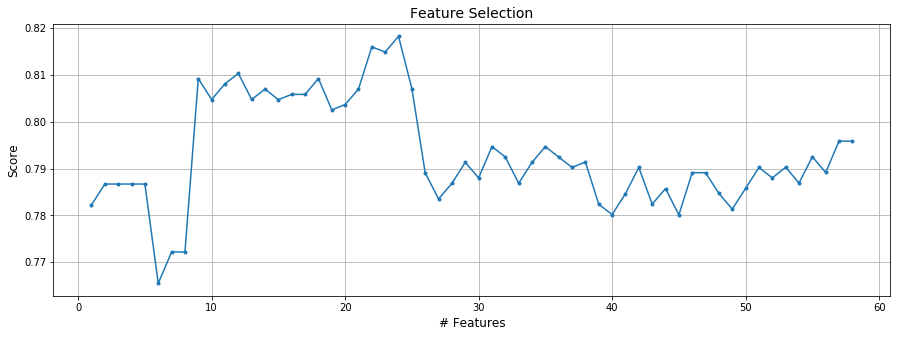

In [55]:
scoreCV = []
scores = []
for i in range(1,len(param_df)):
    new_df = selec_X[param_df.index[0:i+1].values]
    XX = new_df.ix[:,1::]
    yy = new_df.ix[:,0]
    dt = DecisionTreeClassifier()
    scoreCV = cross_val_score(dt, XX, yy, cv= 10)
    scores.append(np.mean(scoreCV))
plt.figure(figsize=(15,5))
plt.plot(range(1,len(scores)+1),scores, '.-')
plt.axis("tight")
plt.title('Feature Selection', fontsize=14)
plt.xlabel('# Features', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.grid();

Here, after running the algorithm a couple of times, 10 seems to be a reliable amount of features

In [56]:
param_df.index[1:11]

Index(['title_Mr', 'Sex_female', 'Sex_male', 'title_Mrs', 'title_Miss',
       'Pclass_3', 'Cabin_U', 'Pclass_1', 'Fare', 'family_some'],
      dtype='object', name='parameter')

As we can see, these are the 10 best features that should be used for prediction

Model Selection

In [57]:
from sklearn.model_selection import train_test_split
X_b = X[param_df.index[1:11]]
X_b.shape
X_tb = test[param_df.index[1:11]]

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X_b, y, test_size=0.33, random_state=42)

In [59]:
dtca = DecisionTreeClassifier()
dtca.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

Analyzing the different parameters of a Decision Tree

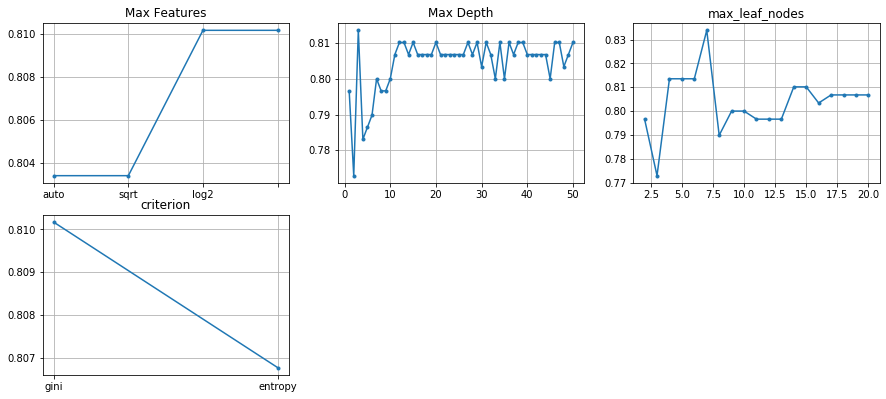

In [60]:
import sklearn
plt.figure(figsize = (15,10))
plt.subplot(3,3,1)
feature_param = ['auto','sqrt','log2',None]
scores=[]
for i in feature_param:
    dectree = DecisionTreeClassifier(max_features = i)
    dectree.fit(X_train,y_train)
    scores.append(dectree.score(X_test,y_test))
plt.plot(scores, '.-')
plt.axis('tight')
# plt.xlabel('parameter')
# plt.ylabel('score')
plt.title('Max Features')
plt.xticks(range(len(feature_param)), feature_param)
plt.grid();

plt.subplot(3,3,2)
feature_param = range(1,51)
scores = []
for i in feature_param:
    dectree = DecisionTreeClassifier(max_depth = i)
    dectree.fit(X_train,y_train)
    scores.append(dectree.score(X_test,y_test))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Max Depth')
plt.grid();

#max_leaf_nodes
plt.subplot(3,3,3)
feature_param = range(2,21)
scores = []
for i in feature_param:
    dectree = DecisionTreeClassifier(max_leaf_nodes = i)
    dectree.fit(X_train,y_train)
    scores.append(dectree.score(X_test,y_test))
plt.plot(feature_param,scores,'.-')
plt.axis('tight')
plt.title('max_leaf_nodes')
plt.grid()

#criterion
plt.subplot(3,3,4)
feature_param = ['gini', 'entropy']
scores = []
for i in feature_param:
    dectree = DecisionTreeClassifier(criterion = i)
    dectree.fit(X_train,y_train)
    scores.append(dectree.score(X_test,y_test))
plt.plot(feature_param,scores,'.-')
plt.axis('tight')
plt.title('criterion')
plt.grid()

    

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
X_train.head()

,title_Mr,Sex_female,Sex_male,title_Mrs,title_Miss,Pclass_3,Cabin_U,Pclass_1,Fare,family_some
6,1,0,1,0,0,0,0,1,51.8625,0
718,1,0,1,0,0,1,1,0,15.5000,0
685,1,0,1,0,0,0,1,0,41.5792,0
73,1,0,1,0,0,1,1,0,14.4542,1
882,0,1,0,0,1,1,1,0,10.5167,0


In [63]:
X_b.head()

,title_Mr,Sex_female,Sex_male,title_Mrs,title_Miss,Pclass_3,Cabin_U,Pclass_1,Fare,family_some
0,1,0,1,0,0,1,1,0,7.2500,1
1,0,1,0,1,0,0,0,1,71.2833,1
2,0,1,0,0,1,1,1,0,7.9250,0
3,0,1,0,1,0,0,0,1,53.1000,1
4,1,0,1,0,0,1,1,0,8.0500,0


In [64]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
forest = RandomForestClassifier(max_depth = 50,                                
                                min_samples_split =7,
                                min_weight_fraction_leaf = 0.0,
                                max_leaf_nodes = 18)

parameter_grid = {'n_estimators' : [15, 100, 200],
                  'criterion' : ['gini', 'entropy'],
                  'max_features' : ['auto', 'sqrt', 'log2', None],
                 }

grid_search = GridSearchCV(forest, param_grid=parameter_grid, cv=StratifiedKFold(5))
grid_search.fit(X_b, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8338945005611672
Best parameters: {'criterion': 'entropy', 'max_features': None, 'n_estimators': 100}


In [65]:
forest = RandomForestClassifier(n_estimators = 200,
                                criterion = 'gini',
                                max_features = 'sqrt')

parameter_grid = {'max_depth' : [None, 50],
                  'min_samples_split' : [7, 11],
                  'min_weight_fraction_leaf' : [0.0, 0.2],
                  'max_leaf_nodes' : [18, 20],
                 }

grid_search = GridSearchCV(forest, param_grid=parameter_grid, cv=StratifiedKFold(5))
grid_search.fit(X_b, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.819304152637486
Best parameters: {'max_depth': 50, 'max_leaf_nodes': 18, 'min_samples_split': 11, 'min_weight_fraction_leaf': 0.0}


In [71]:
clf = RandomForestClassifier(n_estimators = 200,
                                criterion = 'entropy',
                                max_features = 'auto',
                                max_depth = 50,                                
                                min_samples_split =11,
                                min_weight_fraction_leaf = 0.0,
                                max_leaf_nodes = 18)

clf.fit(X_b, y)
Y_pred_RF = clf.predict(X_tb)

clf.score(X_test,y_test)

0.8677966101694915

In [72]:
submission = pd.DataFrame({
    'PassengerId':passngr,
    'Survived':Y_pred_RF
})
submission.to_csv('titanic.csv', index=False)

In [73]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
